In [33]:
import lightkurve as lk
pixelfile = lk.search_targetpixelfile("HD142527")[0].download()
pixelfile.animate()

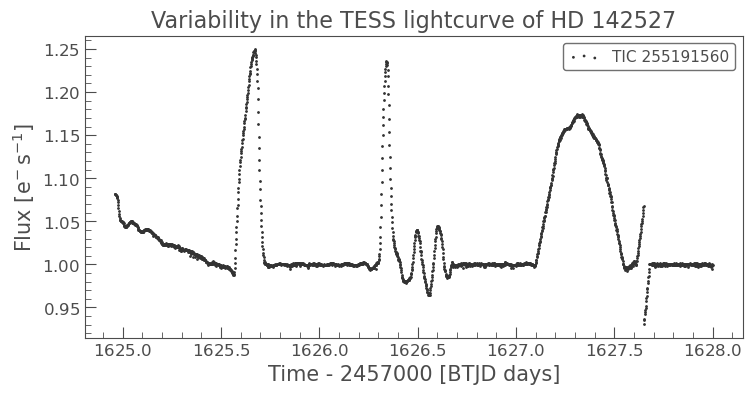

In [76]:
import matplotlib.pyplot as plt
lc = pixelfile.to_lightcurve(aperture_mask='pipeline').flatten()
active = lc.truncate(1570,1628)
active.scatter()
plt.title('Variability in the TESS lightcurve of HD 142527', fontsize=16)
plt.savefig('TESS_active_period.png', dpi=200)

In [60]:
inactive = lc.truncate(1629,1639)

(0.2, 1.0)

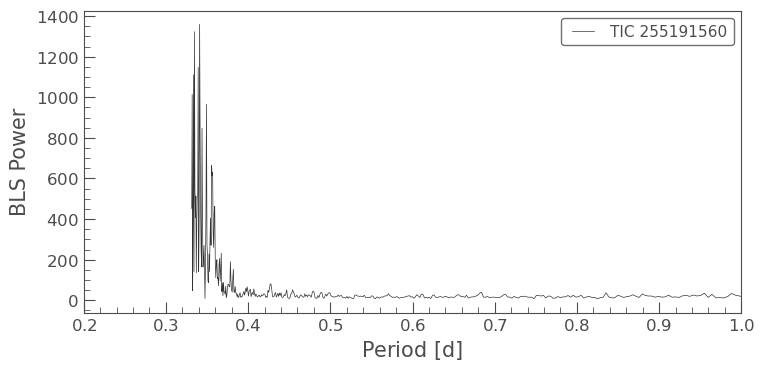

In [69]:
per = inactive.to_periodogram("bls")
per.plot()
plt.xlim(0.2,1)

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

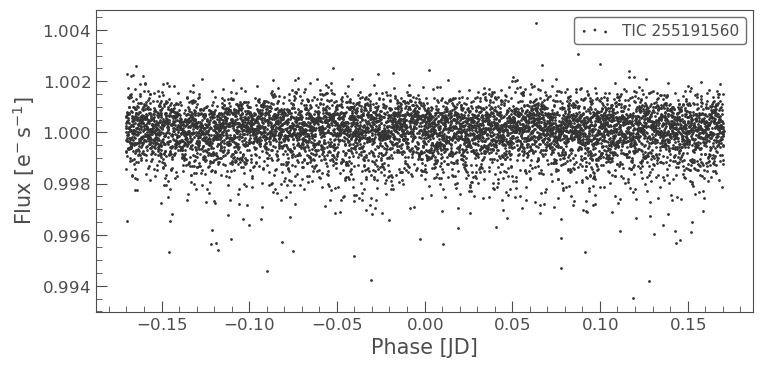

In [64]:
inactive.fold(per.period_at_max_power).scatter()

(9.8, 8.6)

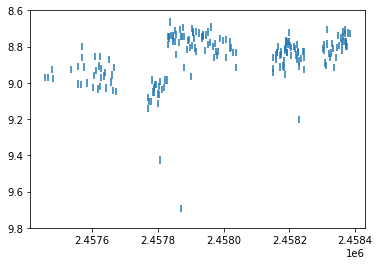

In [75]:
import pandas as pd
asas = pd.read_csv('ASAS-SN_HD142527LC.csv')
plt.errorbar(asas['hjd'], asas['mag'], yerr=asas['mag err'], ls='None')
plt.ylim(9.8,8.6)